In [224]:
%pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt


alpha = -1/2
S = np.pi - 2 * np.arcsin(alpha) + 2 * np.sqrt(1 - alpha ** 2)



x_ = np.linspace(np.pi, 2 * np.pi, 100)
dl = (2*np.pi - np.pi) / 100
S_sin = 0
S_ = 0
for _x in x_:
    S_sin += np.sin(_x) * dl
    S_ += max(np.sin(_x), alpha) * dl
 


def normalize_angles_vector(angles, low=0):
    """Векторизованная нормализация массива углов"""
    period = 2 * np.pi
    angles = np.asarray(angles)
    normalized = angles % period
    if low != 0:
        normalized = np.where(normalized < low, normalized + period, normalized)
    return normalized

dy = (S_sin - S_) / (np.pi)
def sinu(t):
    x = np.mod(t, 2 * np.pi)
    if np.sin(x) + dy < alpha:
        r = alpha
        return r
    else:
        return np.sin(x) + dy



T = 2 * np.pi
dy, S, S_, dl, S_sin

Note: you may need to restart the kernel to use updated packages.


(np.float64(-0.21583850864735238),
 np.float64(5.920841012355268),
 np.float64(-1.3017571691267533),
 0.031415926535897934,
 np.float64(-1.9798338422550525))

In [249]:
epsilon = np.pi - np.arcsin(np.abs(alpha))
beta = -alpha * (np.pi - 2 * epsilon) / (2 * np.pi)

def cat_sin(x):
    x = np.mod(x, 2 * np.pi)
    if np.sin(x) < alpha:
        return alpha + beta
    else:
        return np.sin(x) + beta
beta, epsilon, 7 * np.pi / 6

(np.float64(-0.16666666666666663),
 np.float64(2.617993877991494),
 3.665191429188092)

In [250]:
def int_arr(arr, dx):
    S = 0
    for el in arr:
        S += el * dx
    return S

In [251]:
L = np.pi
l = np.linspace(-L, L, 1000)
dl = 2 * np.pi / 1000

F = cat_sin

In [252]:
a0 = 1 / L * np.sum([F(l[i]) * dl for i in range(0, len(l))])

In [253]:

def a_n(n):
    ar = [F(l[i]) * np.cos(n * np.pi * l[i] / L) * dl for i in range(0, len(l))]
    return 1 / L * np.sum(ar)

In [254]:
def b_n(n):
    ar = [F(l[i]) * np.sin(n * np.pi * l[i] / L) * dl for i in range(0, len(l))]
    return 1 / L * np.sum(ar)

In [255]:
def f(x, N):
    res = a0 / 2
    for n in range(1, N):
        f_n = a_n(n) * np.cos(n * np.pi * x / L) + b_n(n) * np.sin(n * np.pi * x / L)
        res += f_n
        #print(res)
    return res

-0.36372077105053513 3.3685080148506628


(np.float64(2.617993877991494), np.float64(-0.16666666666666663))

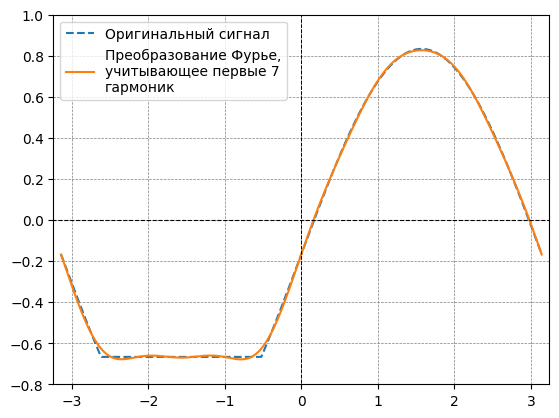

In [257]:
x = np.linspace(-np.pi ,np.pi, 100)
dx = 2 * np.pi / 100

y_g = [sinu(x_) for x_ in x ]

y = [f(x_, N=7) for x_ in x]

cat_y = [cat_sin(x_) for x_ in x]

y_s = [np.sin(x_) for x_ in x]

plt.plot(x, cat_y, linestyle = 'dashed')

plt.plot(x, y)
    

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(["Оригинальный сигнал", "Преобразование Фурье,\nучитывающее первые 7\nгармоник"])

plt.xlim(-np.pi - 0.1, np.pi + 0.1)
plt.ylim(-0.8, 1)

plt.plot([-2 * np.pi, 2 * np.pi], [0, 0], linestyle='dashed', color='black', linewidth=0.8)
plt.plot([0, 0], [-1, 1], linestyle='dashed', color='black', linewidth=0.7)


print(int_arr(y, dx), int_arr(np.abs(cat_y), dx))

#plt.tight_layout(pad=0.2)  # отступ
plt.savefig('furie.pdf', dpi=300, transparent=True)
epsilon, beta